In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [4]:
max_examples = 10000 #by increasing this number accuracy will be increased as well
data = data[:max_examples]
labels = labels[:max_examples]

In [5]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)
    

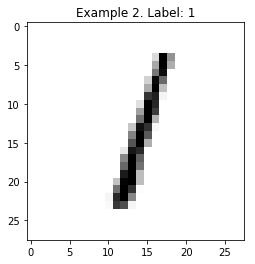

In [6]:
display(2)


In [7]:
print(test_labels)

[7 2 1 ... 4 5 6]


In [8]:
print(mnist.test.labels)

[7 2 1 ... 4 5 6]


In [9]:
featureColumns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=featureColumns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f89af1e70f0>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

In [10]:
classifier.evaluate(test_data, test_labels)
print (classifier.evaluate(test_data, test_labels)["accuracy"])

0.9137


Predicted [7], Label: 7 


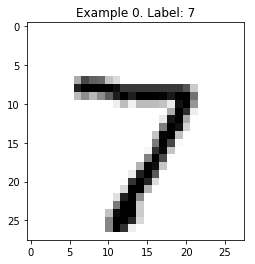

In [11]:
print ("Predicted {}, Label: {} ".format(classifier.predict(np.array([test_data[0]], dtype=float), as_iterable=False), test_labels[0]))
display(0)